In [1]:
pip install pandas_datareader


Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install yfinance


In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pandas_datareader  as data

plt.style.use('fivethirtyeight')
%matplotlib inline

In [4]:
import yfinance as yf
import datetime as dt
stock  ="POWERGRID.NS"
start = dt.datetime(2000,1,1)
end = dt.datetime(2025,5,21)

df = yf.download(stock,start,end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [5]:
df.tail()

Price             Close         High          Low         Open       Volume
Ticker     POWERGRID.NS POWERGRID.NS POWERGRID.NS POWERGRID.NS POWERGRID.NS
Date                                                                       
2025-05-14   295.950012   300.549988   294.049988   299.200012     10359258
2025-05-15   299.649994   300.399994   291.049988   295.899994     22640626
2025-05-16   300.200012   302.200012   295.500000   300.000000     16763668
2025-05-19   304.049988   304.500000   299.000000   302.000000     12575289
2025-05-20   297.899994   305.299988   297.100006   304.399994     21339095

In [6]:
df.shape

(4342, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4342 entries, 2007-10-05 to 2025-05-20
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, POWERGRID.NS)   4342 non-null   float64
 1   (High, POWERGRID.NS)    4342 non-null   float64
 2   (Low, POWERGRID.NS)     4342 non-null   float64
 3   (Open, POWERGRID.NS)    4342 non-null   float64
 4   (Volume, POWERGRID.NS)  4342 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 203.5 KB


In [8]:
df.sum()

Price   Ticker      
Close   POWERGRID.NS    3.733009e+05
High    POWERGRID.NS    3.781623e+05
Low     POWERGRID.NS    3.684985e+05
Open    POWERGRID.NS    3.734608e+05
Volume  POWERGRID.NS    5.186703e+10
dtype: float64

In [9]:
df.columns

MultiIndex([( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [10]:
df = df.reset_index()

In [11]:
df.columns

MultiIndex([(  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [12]:
df.to_csv("powergrid.csv")

In [13]:
datapg = pd.read_csv("powergrid.csv")

In [14]:
datapg.head()

Price        Date               Close                High  \
0  Ticker         NaN        POWERGRID.NS        POWERGRID.NS   
1       0  2007-10-05   32.38557815551758  35.250704510369104   
2       1  2007-10-08   30.72766876220703   33.48012071257007   
3       2  2007-10-09   32.82018280029297   33.10991372744685   
4       3  2007-10-10  33.126007080078125    33.8020487537738   

                  Low                Open        Volume  
0        POWERGRID.NS        POWERGRID.NS  POWERGRID.NS  
1  26.767999775913133  28.908796765471156     855215656  
2  30.534513396740614   33.48012071257007     126671715  
3  29.085860943707615  30.743769817332836     116725709  
4   32.83627618174463   33.67327776759036      67931378

In [15]:
import plotly.graph_objects as go

fig  = go.Figure(data=[go.Candlestick(x = datapg['Date'],open = datapg['Open'],high = datapg['High'],low = datapg['Low'],close = datapg['Close'])])
fig.update_layout(xaxis_rangeslider_visible = False)
fig.show()

In [16]:
df = df.drop(['Date'], axis = 1)

C:\Users\shash\AppData\Local\Temp\ipykernel_14536\1002300862.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [17]:
df.head()

Price         Close         High          Low         Open       Volume
Ticker POWERGRID.NS POWERGRID.NS POWERGRID.NS POWERGRID.NS POWERGRID.NS
0         32.385578    35.250705    26.768000    28.908797    855215656
1         30.727669    33.480121    30.534513    33.480121    126671715
2         32.820183    33.109914    29.085861    30.743770    116725709
3         33.126007    33.802049    32.836276    33.673278     67931378
4         36.828125    38.630901    32.836267    38.630901    106320954

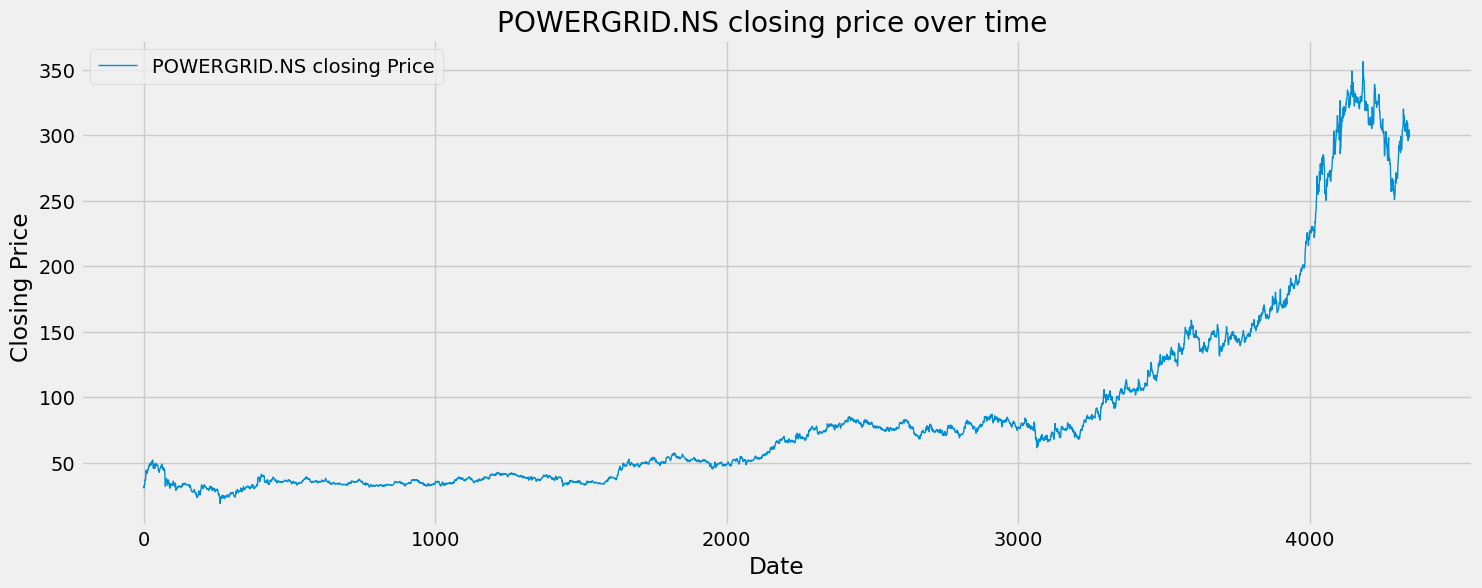

In [18]:
plt.figure(figsize=(16,6))
plt.plot(df['Close'],label = f'{stock} closing Price' ,linewidth = 1)
plt.title(f'{stock} closing price over time ')
plt.xlabel('Date')
plt.ylabel('Closing Price ')
plt.legend()
plt.show()

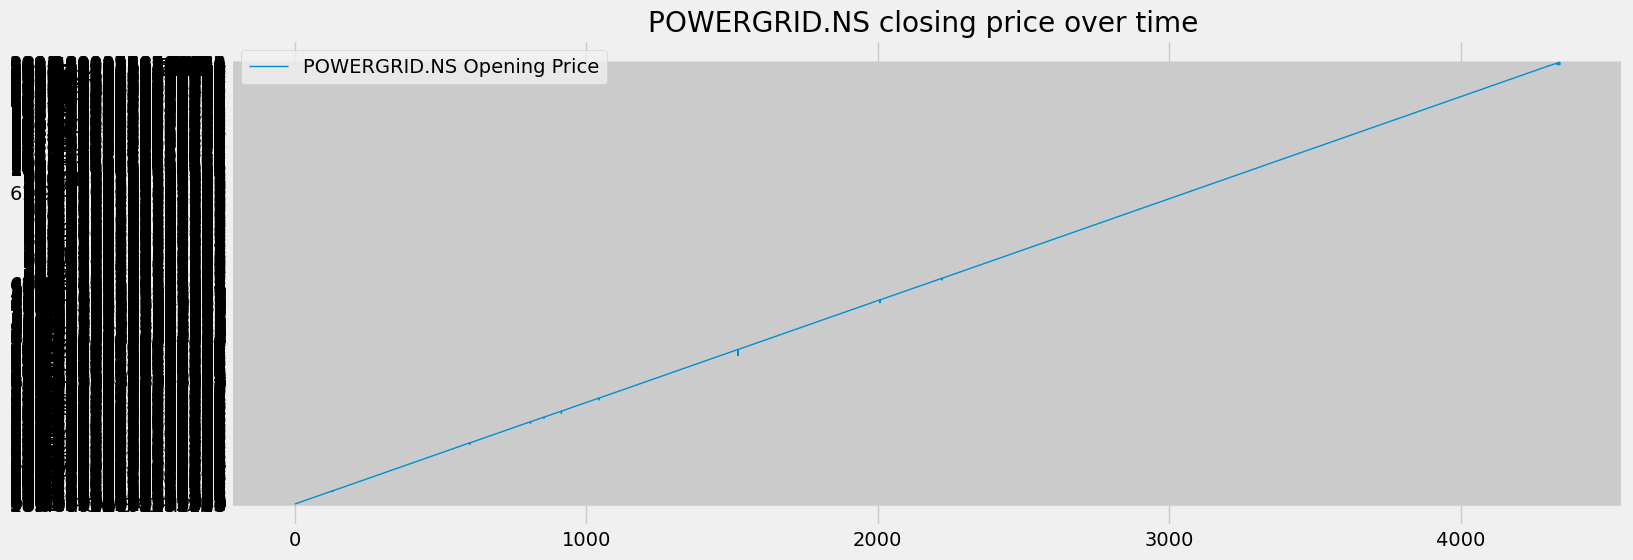

In [19]:
plt.figure(figsize=(16,6))
plt.plot(datapg['Open'],label = f'{stock} Opening Price' ,linewidth = 1)
plt.title(f'{stock} closing price over time ')
plt.legend()
plt.show()

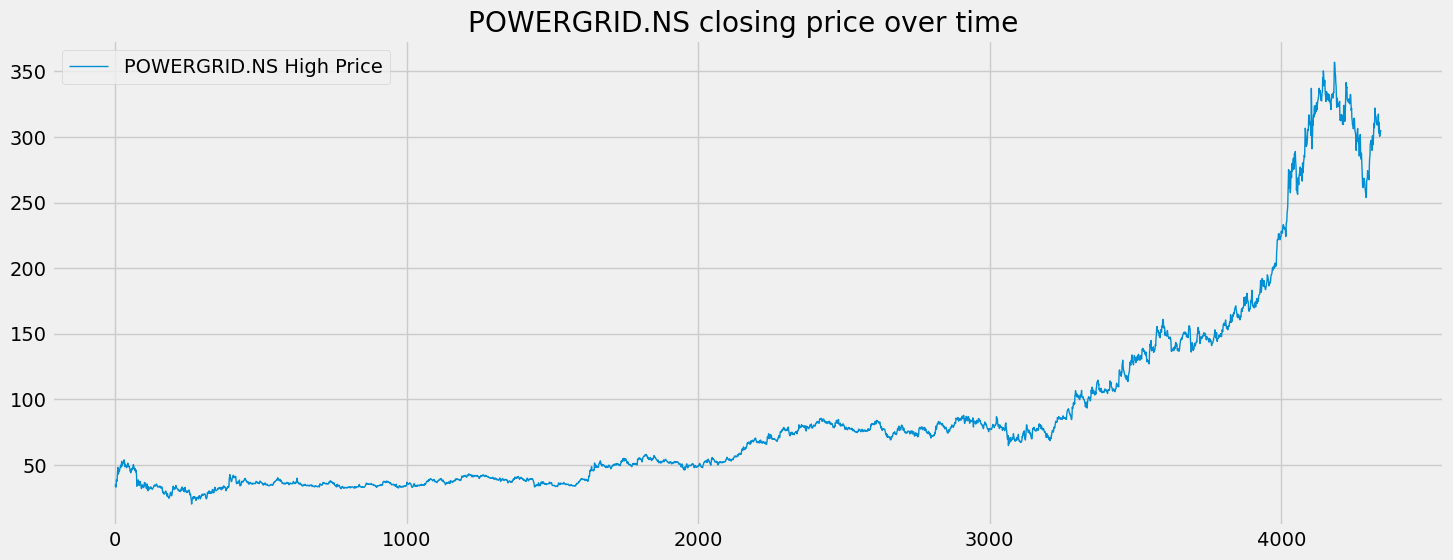

In [20]:
plt.figure(figsize=(16,6))
plt.plot(df['High'],label = f'{stock} High Price' ,linewidth = 1)
plt.title(f'{stock} closing price over time ')
plt.legend()
plt.show()

In [21]:
#moving average
temp_data = [10,20,30,40,50,60,70,80,90]
print(sum(temp_data[2:7])/5)


50.0


In [22]:
import pandas as pd 
datapg = pd.DataFrame(temp_data)

In [23]:
datapg.rolling(5).mean()

0
0   NaN
1   NaN
2   NaN
3   NaN
4  30.0
5  40.0
6  50.0
7  60.0
8  70.0

In [24]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker  POWERGRID.NS
0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
...              ...
4337      289.626726
4338      289.363350
4339      289.187020
4340      289.048202
4341      288.905707

[4342 rows x 1 columns]

In [25]:
ma200 = df.Close.rolling(200).mean()

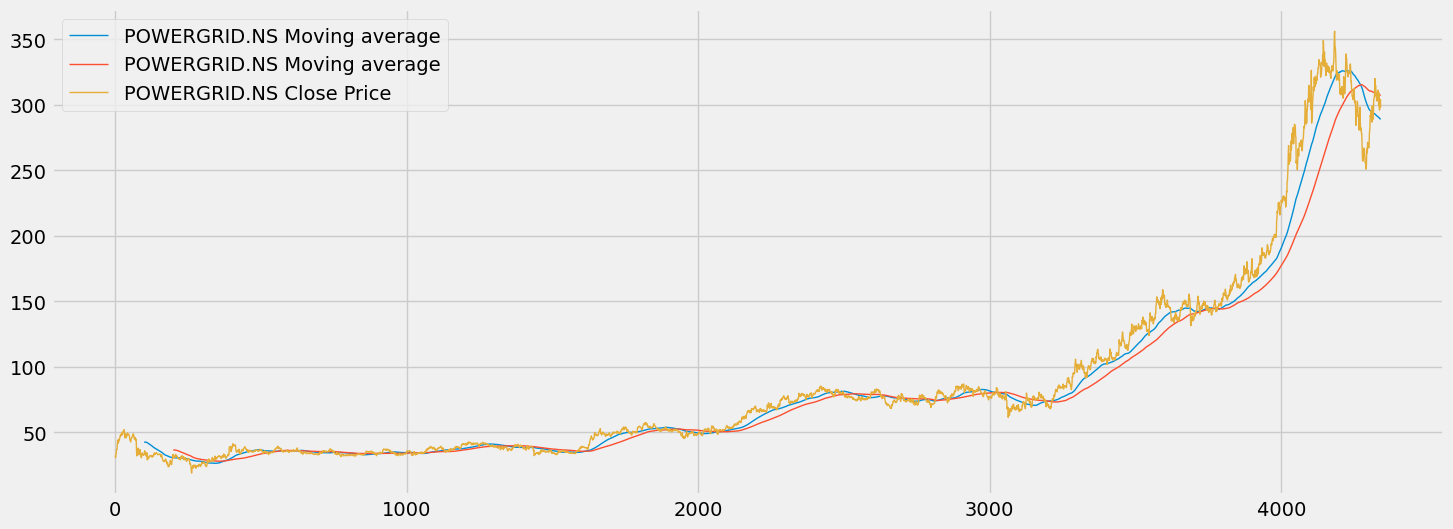

In [26]:
plt.figure(figsize=(16,6))
plt.plot(ma100,label = f'{stock} Moving average' ,linewidth = 1)
plt.plot(ma200,label = f'{stock} Moving average' ,linewidth = 1)
plt.plot(df['Close'],label = f'{stock} Close Price' ,linewidth = 1)
plt.legend()
plt.show()


In [27]:
ema100 = df.Close.ewm(span = 100,adjust=False).mean()
ema200 = df ['Close'].ewm(span=200, adjust = False).mean()

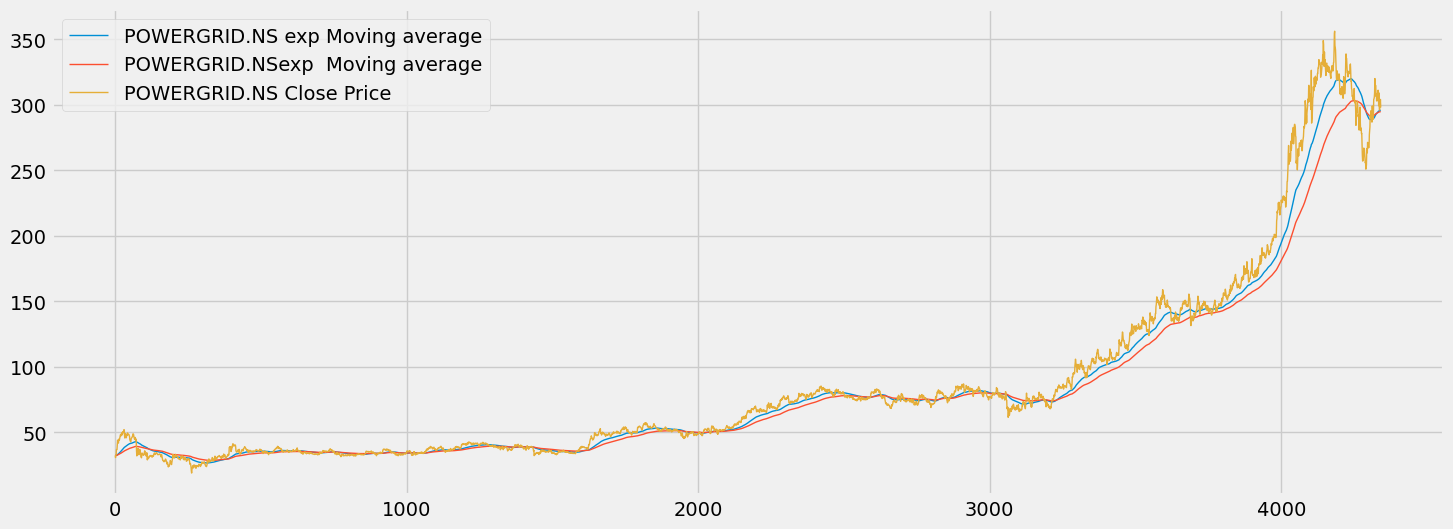

In [28]:
plt.figure(figsize=(16,6))
plt.plot(ema100,label = f'{stock} exp Moving average' ,linewidth = 1)
plt.plot(ema200,label = f'{stock}exp  Moving average' ,linewidth = 1)
plt.plot(df['Close'],label = f'{stock} Close Price' ,linewidth = 1)
plt.legend()
plt.show()


In [29]:
#LSTM (Long Short Term Memory) Training & testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [30]:
data_training.shape

(3039, 1)

In [31]:
data_testing .shape

(1303, 1)

In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

In [33]:
data_training_array = scaler.fit_transform(data_training)

In [34]:
data_training_array

array([[0.19808603],
       [0.17371825],
       [0.2044738 ],
       ...,
       [0.88780183],
       [0.8726943 ],
       [0.8497303 ]])

In [35]:
x_train = []
y_train = []


for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train,y_train = np.array(x_train), np.array(y_train)

In [36]:
x_train.shape

(2939, 100, 1)

In [39]:
#model building

from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential

In [40]:
model  = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))  # ✅ Correct spelling

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))  # ✅ Correct spelling

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))  # ✅ Correct spelling

model.add(LSTM(units=120, activation='relu'))  # No return_sequences on the last LSTM
model.add(Dropout(0.5))  # ✅ Correct spelling

model.add(Dense(units=1))






C:\Users\shash\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [85]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [89]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 28s 208ms/step - loss: 0.0953
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 200ms/step - loss: 0.0098
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 214ms/step - loss: 0.0079
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 217ms/step - loss: 0.0069
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 219ms/step - loss: 0.0065
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 204ms/step - loss: 0.0058
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 202ms/step - loss: 0.0060
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 200ms/step - loss: 0.0058
Epoch 9/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 214ms/step - loss: 0.0058
Epoch 10/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 203ms/step - loss: 0.0052
Epoch 11/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 208ms/step - loss: 0.0048
Epoch 12/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 201ms/step - loss: 0.0044
Epoch 13/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 226ms/step - loss: 0.0042
Epoch 14/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 230ms/step - loss: 0.0037
Epoch 15/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 

In [110]:
past_100_days = data_training.tail(100)

In [122]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)



In [124]:
final_df.head()

Ticker  POWERGRID.NS
0          82.415970
1          83.073814
2          82.703781
3          80.668549
4          77.420441

In [130]:
input_data = scaler.fit_transform(final_df)

In [139]:
x_test = []
y_test = []


for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

x_test,y_test = np.array(x_test), np.array(y_test)
x_test.shape

(1303, 100, 1)

In [142]:
y_predicted = model.predict(x_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step


In [144]:
y_predicted.shape

(1303, 1)

In [146]:
scaler.scale_

array([0.00339369])

In [148]:
scaler_factor = 1/ 0.0035166
y_predicted = y_predicted * scaler_factor
y_test = y_test*scaler_factor

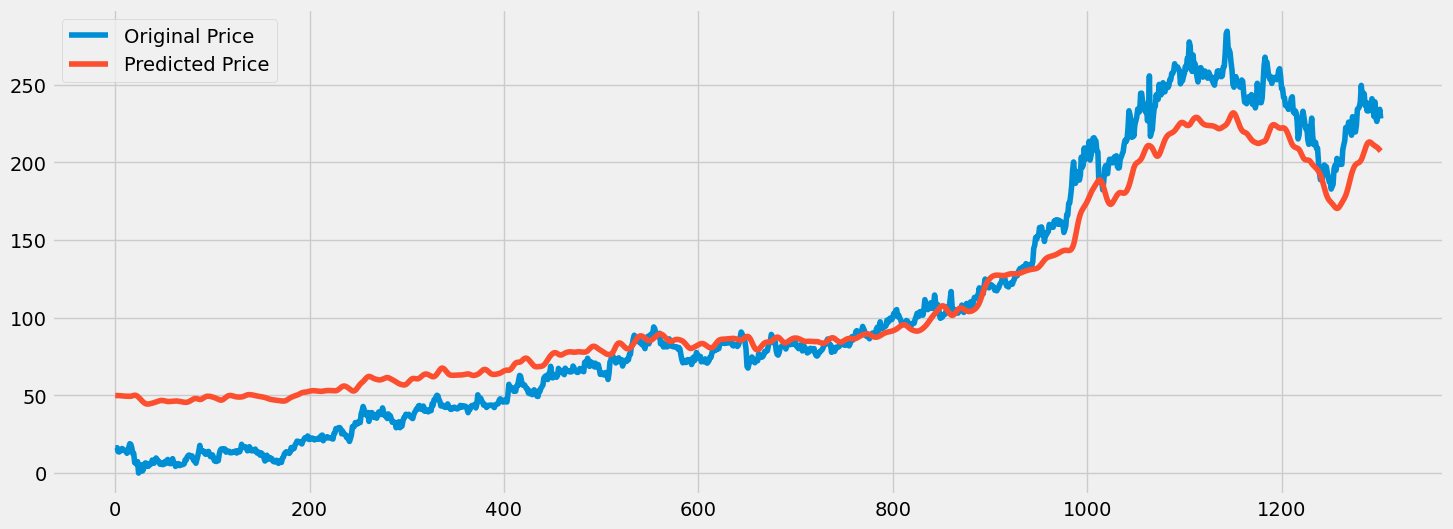

In [150]:
plt.figure(figsize=(16,6))
plt.plot(y_test,label = 'Original Price' )
plt.plot(y_predicted,label = 'Predicted Price')
plt.legend()
plt.show()

In [152]:
model.save('stock_d1_model.h5')